In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [167]:
df = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [168]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [169]:
from sklearn.decomposition import PCA
import pandas as pd
### Your code is here

pca = PCA(n_components=2)
pca.fit(df)
expl = pca.explained_variance_ratio_
print (expl)

[0.63144198 0.21118889]


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


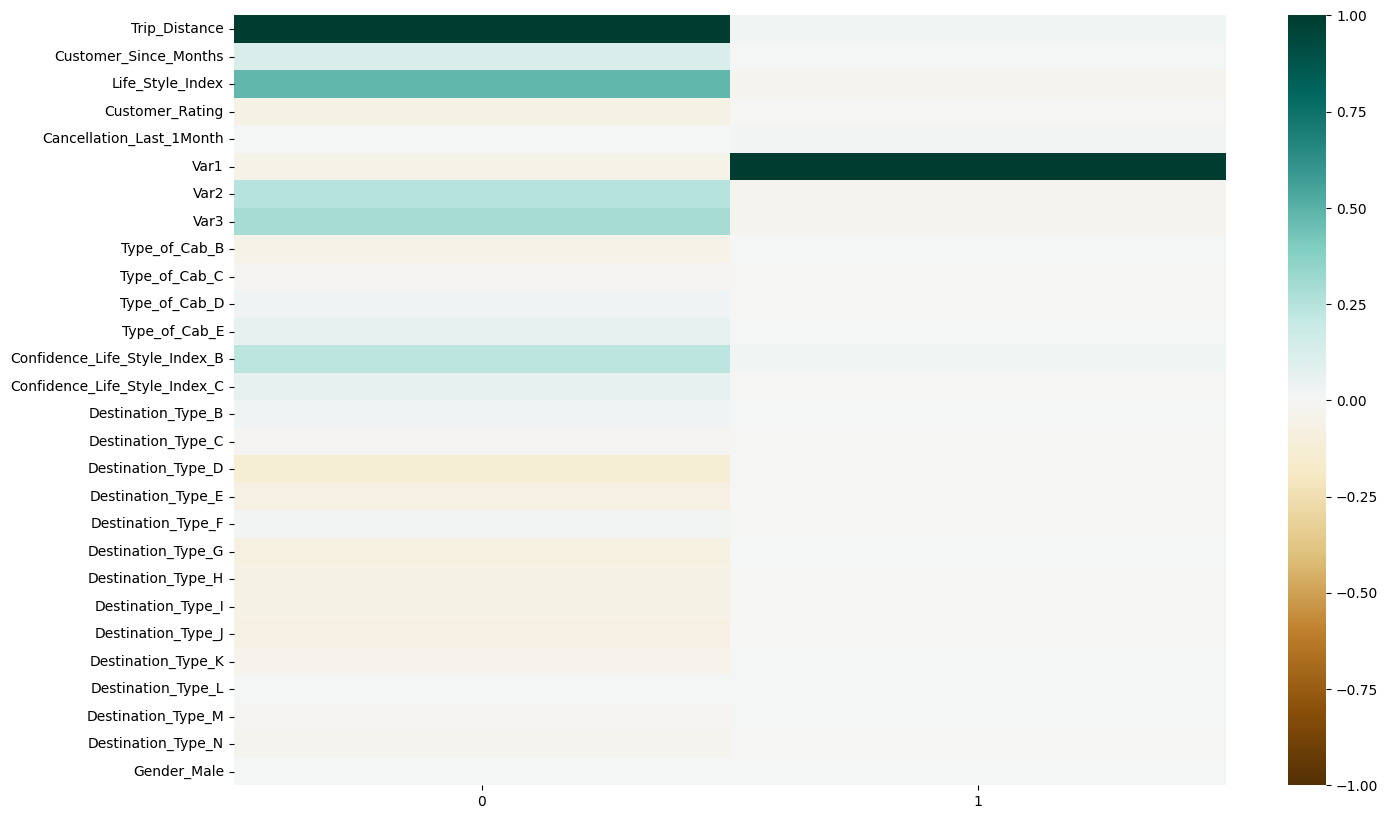

In [170]:
### Your code is here
PCA_dataset = pca.fit_transform(X)
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)

corrs = pd.concat((first_component_corr, second_component_corr),axis=1)
corrs.columns 
import seaborn as sns
fig = plt.figure()
fig.set_size_inches(16,10)
sns.heatmap(corrs, xticklabels=corrs.columns, yticklabels=corrs.index, cmap='BrBG', vmin=-1, vmax=1 )
plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

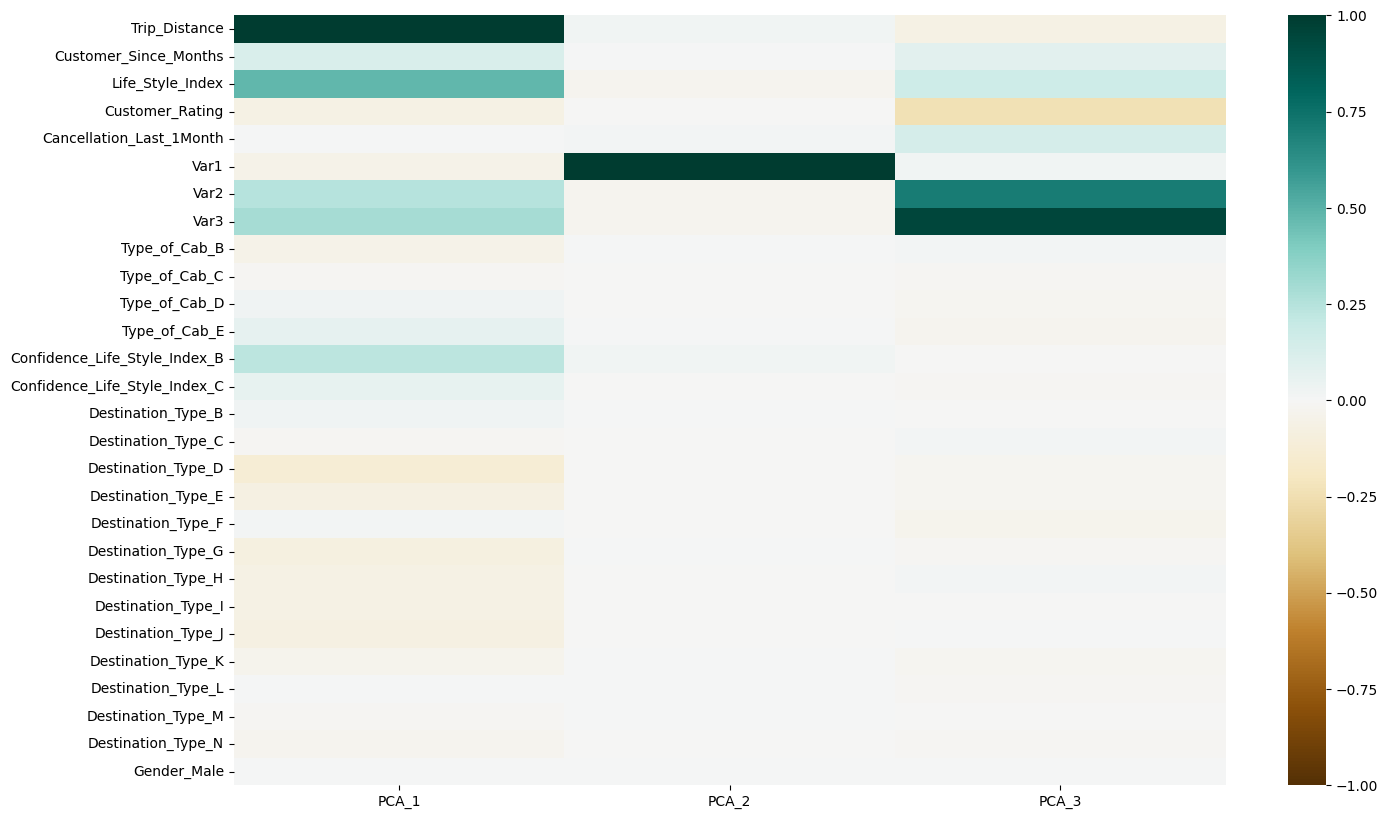

Var3


In [171]:
### Your code is here

pca_3d = PCA(n_components=3)
pca_3d.fit(X)
PCA_dataset_3d = pca_3d.transform(X)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns = ['PCA_1', 'PCA_2','PCA_3'])

# X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])


first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, second_component_corr_3d, third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2','PCA_3']
fig = plt.figure()
fig.set_size_inches(16,10)
sns.heatmap(corrs_3d, xticklabels=corrs_3d.columns, yticklabels=corrs_3d.index, cmap='BrBG', vmin=-1, vmax=1 )
plt.show()
third_component_corr_3d_most = corrs_3d['PCA_3'].abs().sort_values(ascending=False)
most_correlated_feature = third_component_corr_3d_most.index[0]
print (most_correlated_feature)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [183]:
### Your code is here


third_component_corr_3d_most = corrs_3d['PCA_3'].abs().sort_values(ascending=False)
third_most_correlated_feature = third_component_corr_3d_most.index[0]
print (third_most_correlated_feature)

second_component_corr_3d_most = corrs_3d['PCA_2'].abs().sort_values(ascending=False)
second_most_correlated_feature = second_component_corr_3d_most.index[0]
print (second_most_correlated_feature)

first_component_corr_3d_most = corrs_3d['PCA_1'].abs().sort_values(ascending=False)
first_most_correlated_feature = first_component_corr_3d_most.index[0]
print (first_most_correlated_feature)


correlation23 = PCA_dataset_3d[['PCA_2','PCA_3']].corr()
correlation23

Var3
Var1
Trip_Distance


,PCA_2,PCA_3
PCA_2,1.000000e+00,-1.047608e-15
PCA_3,-1.047608e-15,1.000000e+00


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [173]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [190]:
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)



param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

# X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.2, 
#                                                     shuffle=True, random_state=2022)


pipe = Pipeline([('standardscaler', StandardScaler()), 
                ('model', LogisticRegression())
                 ])
search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=1)

search.fit(X_train_o, y_train)

y_pred = search.predict(X_test_o)

report = classification_report(y_test, y_pred, digits=3)
print (report)


              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [187]:
### Your code is here


param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

# X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.2, 
#                                                     shuffle=True, random_state=2022)


pipe = Pipeline([('standardscaler', StandardScaler()), 
                 ('PCA',PCA(n_components=2)),
                 ('model', LogisticRegression())
                 ])
search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=1)

search.fit(X_train, y_train)

y_pred = search.predict(X_test)

report = classification_report(y_test, y_pred, digits=3)
print (report)

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.693     0.566     11349
           3      0.493     0.508     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.356     26333
weighted avg      0.386     0.484     0.427     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [176]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [177]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]
from sklearn.metrics import f1_score
for n_components in components_list:
    
    ### Your code is here
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    param_grid = {'Logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
    
    pipe = Pipeline([('Standardscaler', StandardScaler()), ('Logisticregression', LogisticRegression(penalty='l2'))])
    search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted', n_jobs=1)
    
    search.fit(X_train_pca, y_train)
    y_pred = search.best_estimator_.predict(X_test_pca)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_dict[n_components] = f1
# Вывод значения f1_score для 28 компонент
f1_score_28_components = f1_score_dict[28]
print(f"F1 Score for 28 components: {f1_score_28_components:.3f}")
    



F1 Score for 28 components: 0.675
CPU times: user 2min 27s, sys: 37.7 s, total: 3min 4s
Wall time: 26.5 s


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

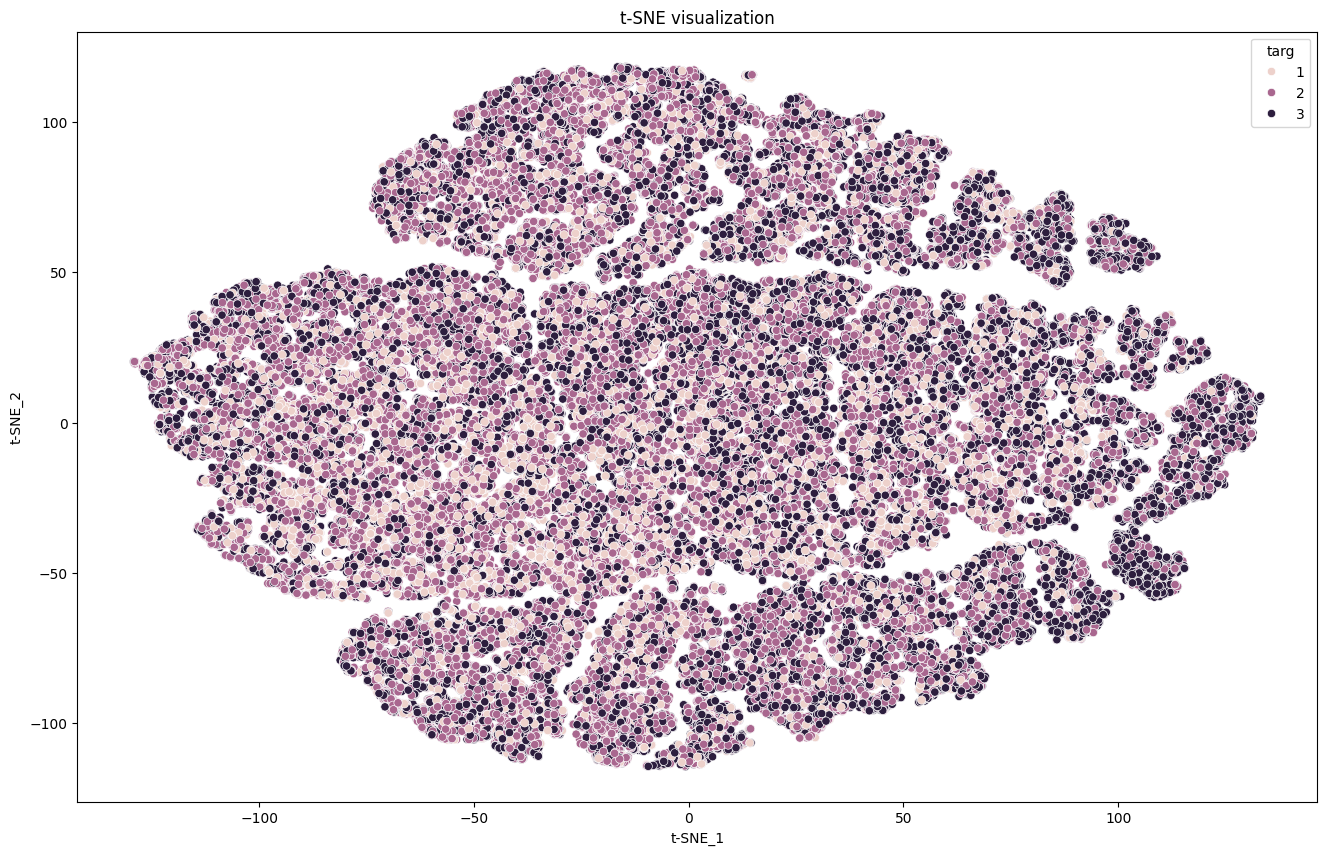

In [191]:
from sklearn.manifold import TSNE

### Your code is here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Обучение t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
X_tsne = pd.DataFrame(X_tsne, columns=['t-SNE_1', 't-SNE_2'])
X_tsne['targ'] = y

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="t-SNE_1", 
                y="t-SNE_2", 
                hue="targ")
plt.title('t-SNE visualization')
plt.show()


**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [179]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!